In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing
from sklearn import metrics
from sklearn.compose import ColumnTransformer
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD
from sklearn.manifold import Isomap, TSNE, MDS
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import random
import warnings 
import pickle
warnings.simplefilter("ignore")

In [5]:
df=pd.read_csv('genres_v2.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [6]:
df2=pd.read_csv('audio_features.csv')
df2.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.634,0.862,2,-5.337,1,0.0376,0.0287,0.000000,0.0217,0.767,95.989,audio_features,1zWZvrk13cL8Sl3VLeG57F,spotify:track:1zWZvrk13cL8Sl3VLeG57F,https://api.spotify.com/v1/tracks/1zWZvrk13cL8...,https://api.spotify.com/v1/audio-analysis/1zWZ...,227693,4
1,0.595,0.389,2,-9.245,1,0.0349,0.4180,0.000001,0.1160,0.400,166.052,audio_features,5kNe7PE09d6Kvw5pAsx23n,spotify:track:5kNe7PE09d6Kvw5pAsx23n,https://api.spotify.com/v1/tracks/5kNe7PE09d6K...,https://api.spotify.com/v1/audio-analysis/5kNe...,227427,4
2,0.543,0.837,11,-6.448,1,0.0608,0.1170,0.000000,0.0872,0.506,168.056,audio_features,6GsAD8PgHxmEuIPTG8GP3M,spotify:track:6GsAD8PgHxmEuIPTG8GP3M,https://api.spotify.com/v1/tracks/6GsAD8PgHxmE...,https://api.spotify.com/v1/audio-analysis/6GsA...,186080,4
3,0.688,0.702,7,-4.792,0,0.0499,0.0215,0.000000,0.1280,0.740,94.006,audio_features,6Knv6wdA0luoMUuuoYi2i1,spotify:track:6Knv6wdA0luoMUuuoYi2i1,https://api.spotify.com/v1/tracks/6Knv6wdA0luo...,https://api.spotify.com/v1/audio-analysis/6Knv...,192191,4
4,0.457,0.948,10,-3.364,1,0.0354,0.0191,0.000000,0.0536,0.878,148.000,audio_features,0i5el041vd6nxrGEU8QRxy,spotify:track:0i5el041vd6nxrGEU8QRxy,https://api.spotify.com/v1/tracks/0i5el041vd6n...,https://api.spotify.com/v1/audio-analysis/0i5e...,208960,4


In [7]:
df2=df2.drop(['type','id','uri','track_href','analysis_url'],axis=1)


In [8]:

tempX=df2.iloc[:,:11]
tempX.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.634,0.862,2,-5.337,1,0.0376,0.0287,0.000000,0.0217,0.767,95.989
1,0.595,0.389,2,-9.245,1,0.0349,0.4180,0.000001,0.1160,0.400,166.052
2,0.543,0.837,11,-6.448,1,0.0608,0.1170,0.000000,0.0872,0.506,168.056
3,0.688,0.702,7,-4.792,0,0.0499,0.0215,0.000000,0.1280,0.740,94.006
4,0.457,0.948,10,-3.364,1,0.0354,0.0191,0.000000,0.0536,0.878,148.000


In [9]:
data=df.drop(["type","type","id","uri","track_href","analysis_url","song_name",
                "Unnamed: 0","title", "duration_ms", "time_signature"], axis =1)

data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,hardstyle
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,hardstyle
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,hardstyle


In [10]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [11]:
# tsne = TSNE(n_components=2)
# x_tsne = tsne.fit_transform(x, y)
# plot_tsne = plt.scatter(x_tsne[:,0], x_tsne[:,1], c=np.unique(y))
# handles, labels = plot_tsne.legend_elements()
# lg = plt.legend(handles, list(np.unique(y)), loc = 'center right', bbox_to_anchor=(1.4, 0.5))
# plt.xlabel("T-SNE 1")
# plt.ylabel("T-SNE 2")
# _ = plt.title("T-SNE")

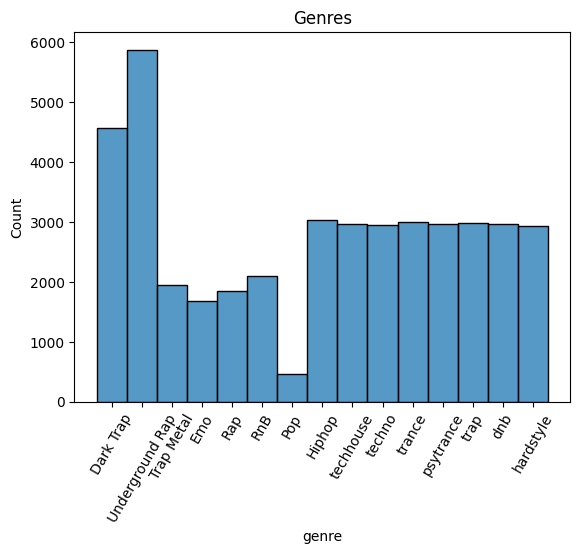

In [12]:
ax = sns.histplot(data["genre"])
_ = plt.xticks(rotation=60)
_ = plt.title("Genres")

In [13]:
dataCopy=data.copy()
data = data.replace("Trap Metal", "Rap")
data = data.replace("Underground Rap", "Rap")
data = data.replace("Emo", "Rap")
data = data.replace("RnB", "Rap")
data = data.replace("Hiphop", "Rap")
data = data.replace("Dark Trap", "Rap")
data = data.replace("Pop", "Rap")

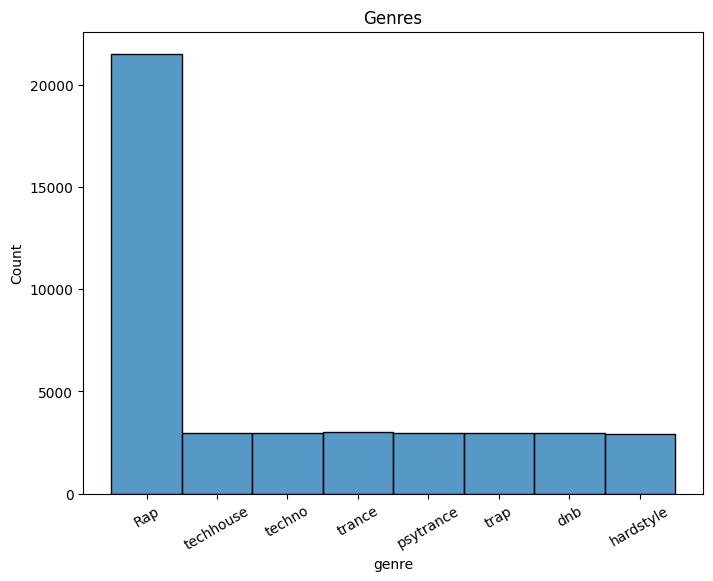

In [14]:
plt.subplots(figsize=(8,6))
ax = sns.histplot(data["genre"])
_ = plt.xticks(rotation=30)
_ = plt.title('Genres')

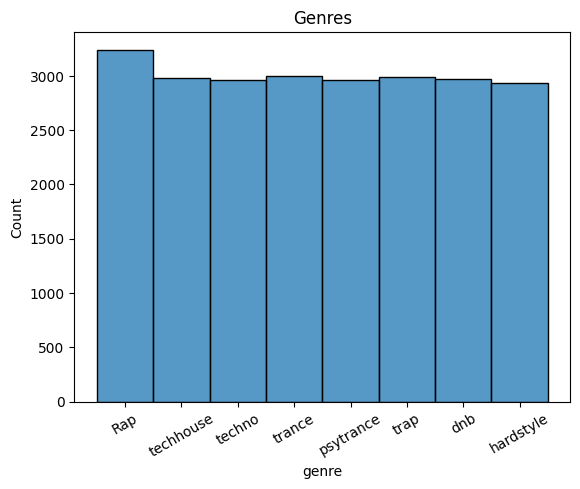

In [15]:
rows_drop = [] 

for i in range(len(data)): 
  if data.iloc[i]['genre'] == 'Rap': 
    if random.random()<0.85: 
      rows_drop.append(i) 
data.drop(index = rows_drop, inplace=True) 

ax = sns.histplot(data["genre"]) 
_ = plt.xticks(rotation=30) 
_ = plt.title("Genres")

In [16]:
x = data.loc[:,:"tempo"]
y = data["genre"]

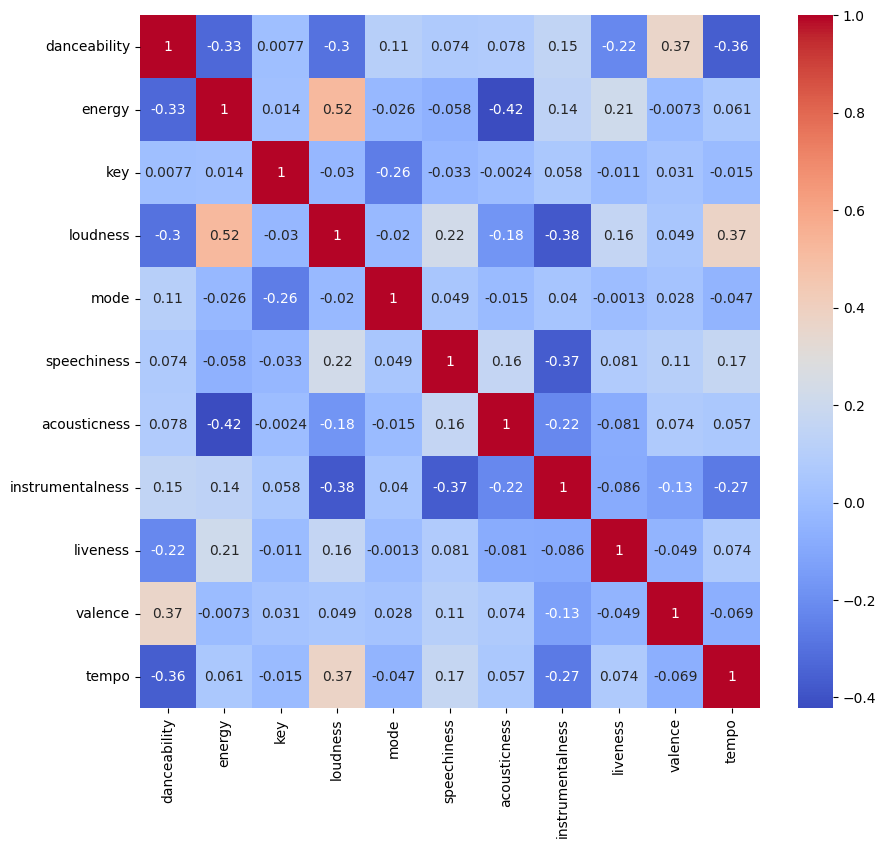

In [17]:
plt.subplots(figsize=(10,9))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.show()

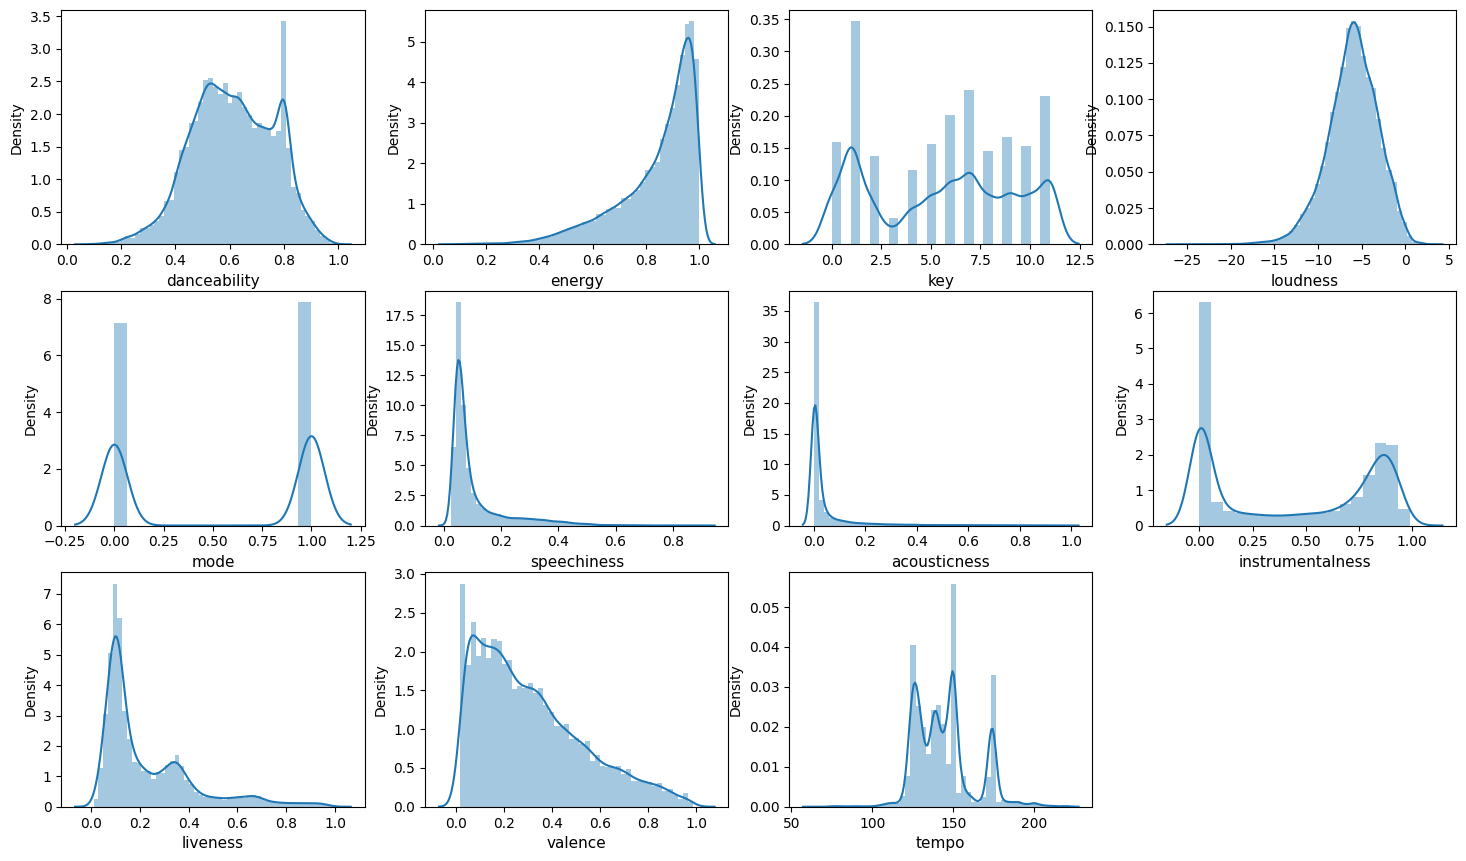

In [18]:
k=0
plt.figure(figsize = (18,14))
for i in x.columns:
    plt.subplot(4,4, k + 1)
    sns.distplot(x[i])
    plt.xlabel(i, fontsize=11)
    k +=1

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
test_size= 0.2, random_state=42,shuffle=True ,stratify=y)

In [20]:
col = xtrain.columns
scalerx = StandardScaler()
xtrain = scalerx.fit_transform(xtrain)
xtest = scalerx.transform(xtest)
xtrain = pd.DataFrame(xtrain, columns = col)
xtest = pd.DataFrame(xtest, columns = col)

In [21]:
le = preprocessing.LabelEncoder()
ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)

In [22]:
pickle.dump(scalerx,open('models/scaler.pkl','wb'))
pickle.dump(le,open('models/encoder.pkl','wb'))

In [23]:
def train_model(model,params={}):
  grid=GridSearchCV(model,param_grid=params,n_jobs=-1,refit=True,cv=3,verbose=1)
  grid.fit(xtrain,ytrain)
  return grid

def report(model, xtest, ytest):
  print(model.best_params_)
  preds=model.predict(xtest)
  ytest=le.inverse_transform(ytest)
  preds=le.inverse_transform(preds)
  cm=metrics.confusion_matrix(ytest,preds)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
  cm_display.plot()
  plt.show()
  print(metrics.classification_report(ytest,preds))
  print('training accuracy:',model.best_score_)
  print('testing accuracy:',metrics.accuracy_score(ytest,preds))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


{}


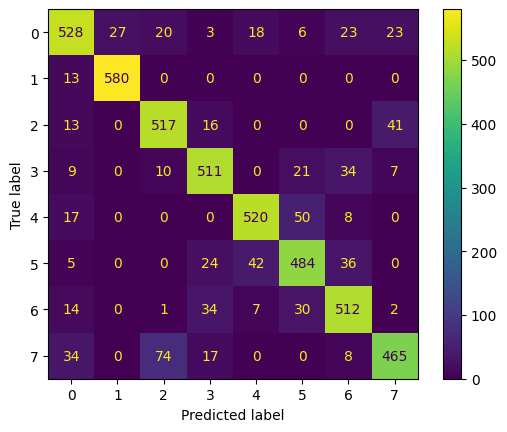

              precision    recall  f1-score   support

         Rap       0.83      0.81      0.82       648
         dnb       0.96      0.98      0.97       593
   hardstyle       0.83      0.88      0.86       587
   psytrance       0.84      0.86      0.85       592
   techhouse       0.89      0.87      0.88       595
      techno       0.82      0.82      0.82       591
      trance       0.82      0.85      0.84       600
        trap       0.86      0.78      0.82       598

    accuracy                           0.86      4804
   macro avg       0.86      0.86      0.86      4804
weighted avg       0.86      0.86      0.86      4804

training accuracy: 0.850281153118145
testing accuracy: 0.8569941715237303


In [24]:

from sklearn.svm import SVC

svc=train_model(SVC(random_state=0),{})
report(svc,xtest,ytest)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
{'n_neighbors': 7}


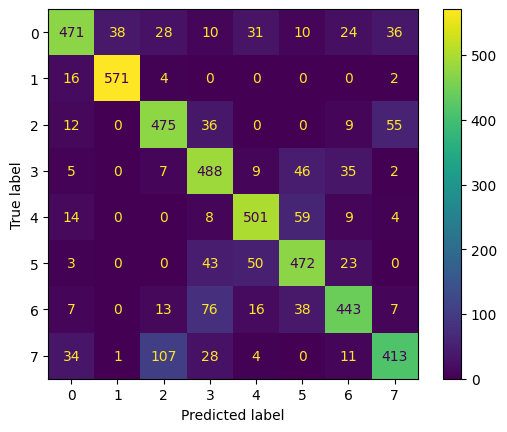

              precision    recall  f1-score   support

         Rap       0.84      0.73      0.78       648
         dnb       0.94      0.96      0.95       593
   hardstyle       0.75      0.81      0.78       587
   psytrance       0.71      0.82      0.76       592
   techhouse       0.82      0.84      0.83       595
      techno       0.76      0.80      0.78       591
      trance       0.80      0.74      0.77       600
        trap       0.80      0.69      0.74       598

    accuracy                           0.80      4804
   macro avg       0.80      0.80      0.80      4804
weighted avg       0.80      0.80      0.80      4804

training accuracy: 0.7812241467288222
testing accuracy: 0.7980849292256453


In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn=train_model(KNeighborsClassifier(),{'n_neighbors':[3,5,7]})
report(knn,xtest,ytest)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
{}


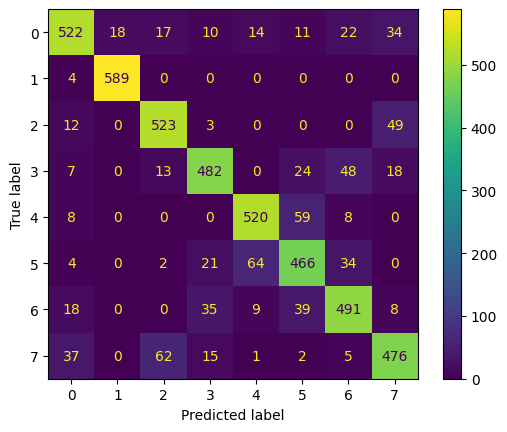

              precision    recall  f1-score   support

         Rap       0.85      0.81      0.83       648
         dnb       0.97      0.99      0.98       593
   hardstyle       0.85      0.89      0.87       587
   psytrance       0.85      0.81      0.83       592
   techhouse       0.86      0.87      0.86       595
      techno       0.78      0.79      0.78       591
      trance       0.81      0.82      0.81       600
        trap       0.81      0.80      0.80       598

    accuracy                           0.85      4804
   macro avg       0.85      0.85      0.85      4804
weighted avg       0.85      0.85      0.85      4804

training accuracy: 0.8303497184894235
testing accuracy: 0.8470024979184013


In [26]:
from sklearn.tree import  DecisionTreeClassifier

dt=train_model(DecisionTreeClassifier(random_state=42),{})
report(dt,xtest,ytest)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
{}


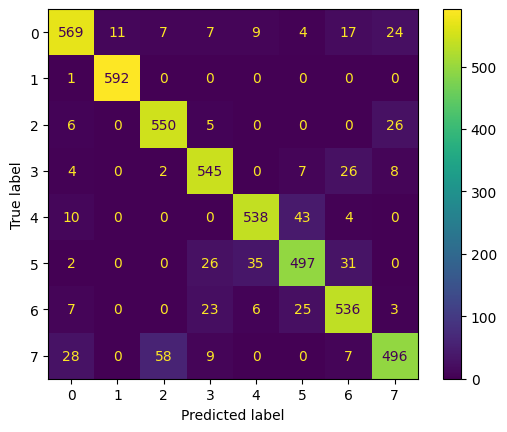

              precision    recall  f1-score   support

         Rap       0.91      0.88      0.89       648
         dnb       0.98      1.00      0.99       593
   hardstyle       0.89      0.94      0.91       587
   psytrance       0.89      0.92      0.90       592
   techhouse       0.91      0.90      0.91       595
      techno       0.86      0.84      0.85       591
      trance       0.86      0.89      0.88       600
        trap       0.89      0.83      0.86       598

    accuracy                           0.90      4804
   macro avg       0.90      0.90      0.90      4804
weighted avg       0.90      0.90      0.90      4804

training accuracy: 0.8927458311631961
testing accuracy: 0.8998751040799334


In [27]:
from sklearn.ensemble import RandomForestClassifier

rf=train_model(RandomForestClassifier(random_state=42),{})
report(rf,xtest,ytest)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
{'learning_rate': 0.2, 'max_depth': 6}


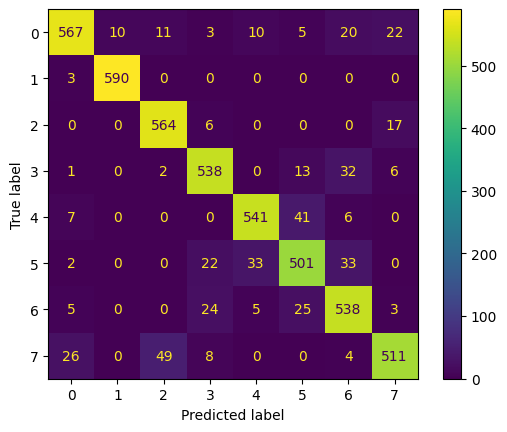

              precision    recall  f1-score   support

         Rap       0.93      0.88      0.90       648
         dnb       0.98      0.99      0.99       593
   hardstyle       0.90      0.96      0.93       587
   psytrance       0.90      0.91      0.90       592
   techhouse       0.92      0.91      0.91       595
      techno       0.86      0.85      0.85       591
      trance       0.85      0.90      0.87       600
        trap       0.91      0.85      0.88       598

    accuracy                           0.91      4804
   macro avg       0.91      0.91      0.91      4804
weighted avg       0.91      0.91      0.91      4804

training accuracy: 0.8977417492334347
testing accuracy: 0.9054954204829309


In [47]:
from xgboost import XGBClassifier


xgb=train_model(
    XGBClassifier(booster='gbtree',eval_metric='merror',seed=42,objective='multi:softprob'),
    {
        'max_depth':list(range(5,20)),
        # 'objective':['mutli:softprob','multi:softmax'],
        # 'n_estimators':list(range(50,100,10)),
        'learning_rate':[0.05,0.1,0.2,0.5,]
    } 
)
report(xgb,xtest,ytest)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
{}


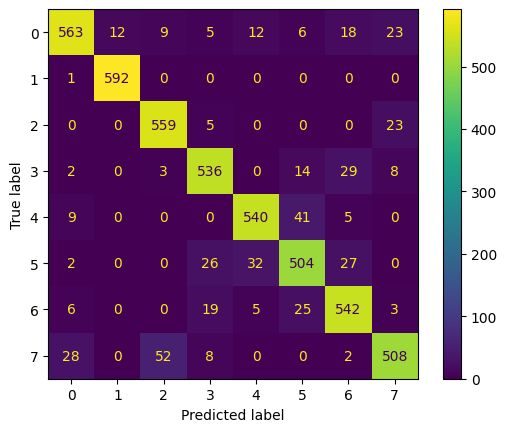

              precision    recall  f1-score   support

         Rap       0.92      0.87      0.89       648
         dnb       0.98      1.00      0.99       593
   hardstyle       0.90      0.95      0.92       587
   psytrance       0.89      0.91      0.90       592
   techhouse       0.92      0.91      0.91       595
      techno       0.85      0.85      0.85       591
      trance       0.87      0.90      0.89       600
        trap       0.90      0.85      0.87       598

    accuracy                           0.90      4804
   macro avg       0.90      0.90      0.90      4804
weighted avg       0.90      0.90      0.90      4804

training accuracy: 0.896544800204791
testing accuracy: 0.9042464612822648


In [29]:
from lightgbm import LGBMClassifier

lgbm=train_model(LGBMClassifier(verbose=0, seed=42, objective='multiclass'),{})
report(lgbm,xtest,ytest)

In [30]:
early_stopping1 = keras.callbacks.EarlyStopping(monitor = "val_loss", 
                                               patience = 20, restore_best_weights = True)
early_stopping2 = keras.callbacks.EarlyStopping(monitor = "val_accuracy", 
                                               patience = 20, restore_best_weights = True)

model = keras.Sequential([
    keras.layers.Input(name = "input", shape = (xtrain.shape[1])),
    keras.layers.Dense(256, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(max(ytrain)+1, activation = "softmax")
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                      

In [31]:
model.compile(optimizer = keras.optimizers.Adam(),
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])

model_history = model.fit(xtrain, ytrain,
                epochs = 500,
                verbose = 1, batch_size = 24,
                validation_data = (xtest, ytest),
                callbacks = [early_stopping1, early_stopping2])

Epoch 1/500


801/801 [==============================] - 11s 9ms/step - loss: 0.7393 - accuracy: 0.7394 - val_loss: 0.4582 - val_accuracy: 0.8366
Epoch 2/500
801/801 [==============================] - 9s 11ms/step - loss: 0.5565 - accuracy: 0.7998 - val_loss: 0.4488 - val_accuracy: 0.8478
Epoch 3/500
801/801 [==============================] - 9s 11ms/step - loss: 0.5356 - accuracy: 0.8119 - val_loss: 0.4393 - val_accuracy: 0.8455
Epoch 4/500
801/801 [==============================] - 9s 11ms/step - loss: 0.5088 - accuracy: 0.8184 - val_loss: 0.4094 - val_accuracy: 0.8535
Epoch 5/500
801/801 [==============================] - 9s 11ms/step - loss: 0.4880 - accuracy: 0.8244 - val_loss: 0.4150 - val_accuracy: 0.8547
Epoch 6/500
801/801 [==============================] - 9s 11ms/step - loss: 0.4689 - accuracy: 0.8331 - val_loss: 0.4095 - val_accuracy: 0.8557
Epoch 7/500
801/801 [==============================] - 9s 11ms/step - loss: 0.4632 - accuracy: 0.8333 - val_loss: 0.4037 - val_accurac

In [32]:
print(model.evaluate(xtrain, ytrain))
print(model.evaluate(xtest, ytest))


601/601 [==============================] - 2s 4ms/step - loss: 0.2533 - accuracy: 0.9091
[0.2532517910003662, 0.9090861678123474]
151/151 [==============================] - 1s 4ms/step - loss: 0.3486 - accuracy: 0.8797
[0.34856685996055603, 0.8796836137771606]


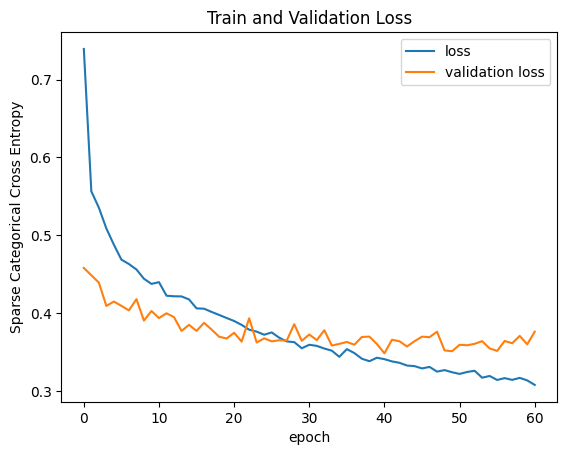

In [33]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.legend(["loss", "validation loss"], loc ="upper right")
plt.title("Train and Validation Loss")
plt.xlabel("epoch")
plt.ylabel("Sparse Categorical Cross Entropy")
plt.show()

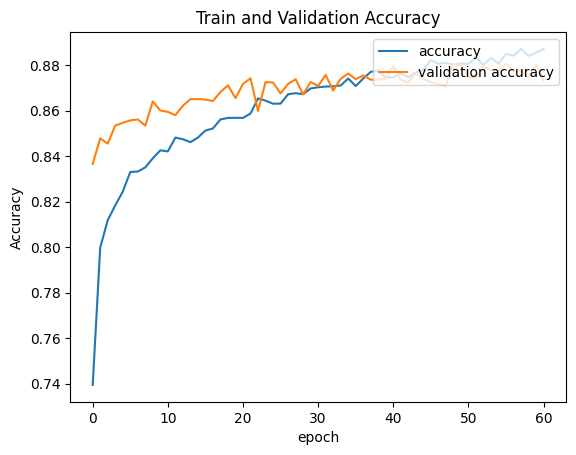

In [34]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.legend(["accuracy", "validation accuracy"], loc ="upper right")
plt.title("Train and Validation Accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.show()

In [35]:
ypred = model.predict(xtest).argmax(axis=1)

151/151 [==============================] - 1s 3ms/step


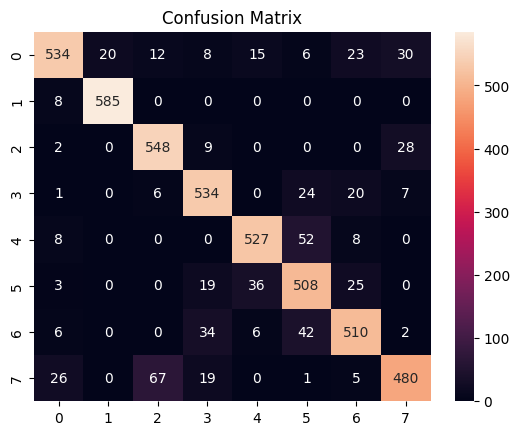

In [36]:
cf_matrix = metrics.confusion_matrix(ytest, ypred)
_ = sns.heatmap(cf_matrix, fmt=".0f", annot=True)
_ = plt.title("Confusion Matrix")

In [37]:
print(metrics.classification_report(le.inverse_transform(ytest), le.inverse_transform(ypred)))

              precision    recall  f1-score   support

         Rap       0.91      0.82      0.86       648
         dnb       0.97      0.99      0.98       593
   hardstyle       0.87      0.93      0.90       587
   psytrance       0.86      0.90      0.88       592
   techhouse       0.90      0.89      0.89       595
      techno       0.80      0.86      0.83       591
      trance       0.86      0.85      0.86       600
        trap       0.88      0.80      0.84       598

    accuracy                           0.88      4804
   macro avg       0.88      0.88      0.88      4804
weighted avg       0.88      0.88      0.88      4804



In [38]:
print(metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       648
           1       0.97      0.99      0.98       593
           2       0.87      0.93      0.90       587
           3       0.86      0.90      0.88       592
           4       0.90      0.89      0.89       595
           5       0.80      0.86      0.83       591
           6       0.86      0.85      0.86       600
           7       0.88      0.80      0.84       598

    accuracy                           0.88      4804
   macro avg       0.88      0.88      0.88      4804
weighted avg       0.88      0.88      0.88      4804



In [39]:
newX=scalerx.transform(tempX)


In [40]:
xgbPreds=xgb.predict(newX)
xgbPreds

array([0, 0, 0, ..., 6, 0, 0], dtype=int64)

In [41]:
lgbmPreds=lgbm.predict(newX)
lgbmPreds

array([0, 0, 0, ..., 6, 0, 0])

In [42]:
modelPreds=model.predict(newX).argmax(axis=1)
modelPreds

1654/1654 [==============================] - 7s 4ms/step


array([0, 0, 0, ..., 6, 0, 4], dtype=int64)

In [43]:
df2['xgbPreds']=xgbPreds
df2['lgbmPreds']=lgbmPreds
df2['modelPreds']=modelPreds


In [44]:
pickle.dump(model,open('models/model.pkl','wb'))
pickle.dump(xgb,open('models/xgb.pkl','wb'))
pickle.dump(lgbm,open('models/lgbm.pkl','wb'))

In [45]:
df2.to_csv('new_audio_features.csv',index=False)

In [46]:
print(len(df2))
print(len(df2[df2['xgbPreds']==df2['lgbmPreds']]))
print(len(df2[df2['xgbPreds']==df2['modelPreds']])) 
print(len(df2[df2['lgbmPreds']==df2['modelPreds']]))
print(len(df2[df2['xgbPreds']==df2['lgbmPreds']][df2['lgbmPreds']==df2['modelPreds']]))

52915
51005
46681
46893
45961
